In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_com_sim
%store -r Y_com_sim
print(X_com_sim.shape)
print(Y_com_sim.shape)

(7395, 22)
(7395, 3)


# Multivariate Linear Regression (CoM Prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Predict CoM (x) movement

In [7]:
X_com_sim[0, :]

array([0.1, 0.1, -0.008996515226481809, 0.013200915423986477,
       0.005032408606005017, -0.0007237745555853984, 0.01639134045253973,
       -0.004252538996206474, 0.2526783703469499, 0.13427893772863944,
       -0.2778846068029694, 0.24869912614405365, -0.12366310216804982,
       -0.3133057085330896, -0.2690074673240338, 0.1271401124419832,
       -0.3136605626775182, -0.26988041665563206, -0.1350023534415291,
       -0.2815400304417422, False, True], dtype=object)

In [8]:
Y_com_sim[0, :]

array([0.015024544741364753, 0.0031745505499044297, 0], dtype=object)

### Linear Regression

In [9]:
def find_best_model(X, Y, runs=1000):
    best_model = None
    lowest_error = 100
    best_Xtr, best_Xte, best_Ytr, best_Yte = None, None, None, None
    
    for _ in range(runs):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, shuffle=True)
        
        model = LinearRegression()
        model.fit(X_train, Y_train)

        predictions = model.predict(X_test)
        error = np.max(np.abs(predictions - Y_test))

        if error < lowest_error:
            best_model = model
            lowest_error = error
            best_Xtr, best_Xte, best_Ytr, best_Yte = X_train, X_test, Y_train, Y_test

    # Stats
    predictions = best_model.predict(best_Xte)
    print('R2: ', r2_score(predictions, best_Yte))
    print('RMSE: ', np.sqrt(mean_squared_error(best_Yte, predictions)))
    print("The lowest error is: ", np.min(np.abs(predictions - best_Yte)))
    print("The highest error is: ", np.max(np.abs(predictions - best_Yte)))
    print("The avg. error is: ", np.mean(np.abs(predictions - best_Yte)))
    
    return best_Xte, best_Yte, predictions, best_model

In [10]:
X_com_sim[0, :]

array([0.1, 0.1, -0.008996515226481809, 0.013200915423986477,
       0.005032408606005017, -0.0007237745555853984, 0.01639134045253973,
       -0.004252538996206474, 0.2526783703469499, 0.13427893772863944,
       -0.2778846068029694, 0.24869912614405365, -0.12366310216804982,
       -0.3133057085330896, -0.2690074673240338, 0.1271401124419832,
       -0.3136605626775182, -0.26988041665563206, -0.1350023534415291,
       -0.2815400304417422, False, True], dtype=object)

In [ ]:
R2:  0.9766916097431257
RMSE:  0.012284494986901706
The lowest error is:  3.757146235280895e-05
The highest error is:  0.03631070534239761
The avg. error is:  0.009700068806445089

In [21]:
# Input
X = np.hstack((X_com_sim[:, 0:1], # Vref-1
               X_com_sim[:, 1:2], # Vref
               X_com_sim[:, 2:3], # Act-1
               X_com_sim[:, 5:6], # Act
               X_com_sim[:, 8:10], # FL position
               X_com_sim[:, 11:13], # FR position
               X_com_sim[:, 14:16], # RL position
               X_com_sim[:, 17:19])) # RR position

# Labels
Y = np.array([Y_com_sim[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split dataset and fit best model
X_test, Y_test, predictions, model_fr_com_x = find_best_model(X, Y, runs=5000)

R2:  0.9868154332411888
RMSE:  0.009470625985285508
The lowest error is:  6.809287538024622e-06
The highest error is:  0.02625836407176685
The avg. error is:  0.007386365027706884


In [13]:
model_fr_com_x.coef_

array([[ 0.45633932,  0.14248853,  0.05553078, -0.37462352, -0.25703703,
         0.34199386, -0.20939287, -0.39717463,  0.02317998, -0.076498  ,
         0.07556964,  0.13677518]])

In [14]:
model_fr_com_x.intercept_

array([0.0723266])

Text(0, 0.5, 'Predictions')

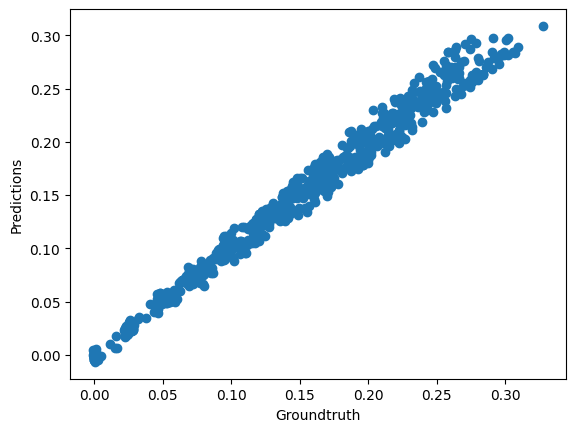

In [15]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [14]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

## Predict CoM -> y

### Linear Regression

In [16]:
# Input
X = np.hstack((X_com_sim[:, 0:1], # Vref-1
               X_com_sim[:, 1:2], # Vref
               X_com_sim[:, 2:3], # Act-1
               X_com_sim[:, 5:6], # Act
               X_com_sim[:, 8:10], # FL position
               X_com_sim[:, 11:13], # FR position
               X_com_sim[:, 14:16], # RL position
               X_com_sim[:, 17:19])) # RR position

# Labels
Y = np.array([Y_com_sim[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split dataset and fit best model
X_test, Y_test, predictions, model_fr_com_y = find_best_model(X, Y, runs=5000)

R2:  -9.946857973783091
RMSE:  0.006007411748578257
The lowest error is:  1.0716760886355899e-05
The highest error is:  0.020536449165516318
The avg. error is:  0.0037066207059185566


In [17]:
model_fr_com_y.coef_

array([[-0.0042293 ,  0.0011165 ,  0.00043951,  0.00694202,  0.11345369,
         0.1047109 , -0.0470131 ,  0.08688261,  0.03744656, -0.0103423 ,
        -0.15063025,  0.03841101]])

In [18]:
model_fr_com_y.intercept_

array([-0.0420708])

Text(0, 0.5, 'Predictions')

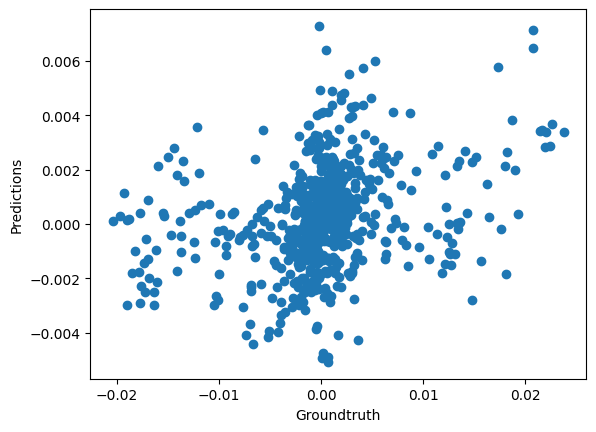

In [19]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')